<a href="https://colab.research.google.com/github/EdgaRojas/MachineLearning/blob/main/Unidad2/2_Arboles_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de Regresión


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("asesinatos.csv", encoding='latin-1')

In [4]:
df.head()

,Estado,id_area,habitantes,area_km2,ingresos_medios,edad_media_poblacion,densidad_poblacional,indice_gini,tasa_desempleo_juvenil,porcentaje_sin_diploma_secundaria,porcentaje_hogares_monoparentales,gasto_policial_per_capita,inversion_programas_sociales_per_capita,tiempo_respuesta_emergencias_min,porcentaje_zonas_verdes,tasa_asesinatos_por_100mil
0,Puebla,1,207953,26.70,48018,40.8,7787.47,0.522,21.8,30.3,40.0,867,240,3.0,5.0,27.1
1,Durango,2,80226,17.39,50295,42.4,4612.66,0.346,19.2,18.9,23.5,706,458,3.0,11.1,13.6
2,Tabasco,3,260806,70.69,50795,39.5,3689.22,0.417,23.0,33.5,23.8,981,403,4.3,8.1,20.6
3,Baja California Sur,4,969508,830.49,68910,27.3,1167.39,0.399,28.8,17.7,23.5,951,326,7.5,16.1,18.5
4,Aguascalientes,5,69478,30.59,54248,36.2,2271.26,0.422,16.4,33.6,27.6,563,353,7.2,10.6,16.8


In [5]:
X = df[['indice_gini', 'tasa_desempleo_juvenil', 'ingresos_medios', 'porcentaje_sin_diploma_secundaria']]
y = df['tasa_asesinatos_por_100mil']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
tree_model = DecisionTreeRegressor(random_state=42, max_depth=4)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [9]:
y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Error cuadrático medio (MSE): {mse_tree:.2f}")
print(f"Coeficiente de determinación (R²): {r2_tree:.2f}")

Error cuadrático medio (MSE): 12.79
Coeficiente de determinación (R²): 0.37


In [10]:
import numpy as np
rmse = np.sqrt(mse_tree)
print(rmse)

3.576618496274158


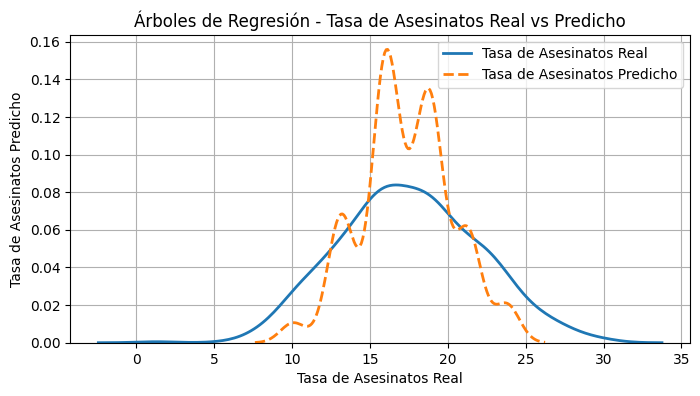

In [11]:
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Tasa de Asesinatos Real', linewidth=2)
sns.kdeplot(y_pred_tree, label='Tasa de Asesinatos Predicho', linewidth=2, linestyle='--')

plt.title('Árboles de Regresión - Tasa de Asesinatos Real vs Predicho')
plt.xlabel('Tasa de Asesinatos Real')
plt.ylabel('Tasa de Asesinatos Predicho')
plt.legend()
plt.grid(True)
plt.show()

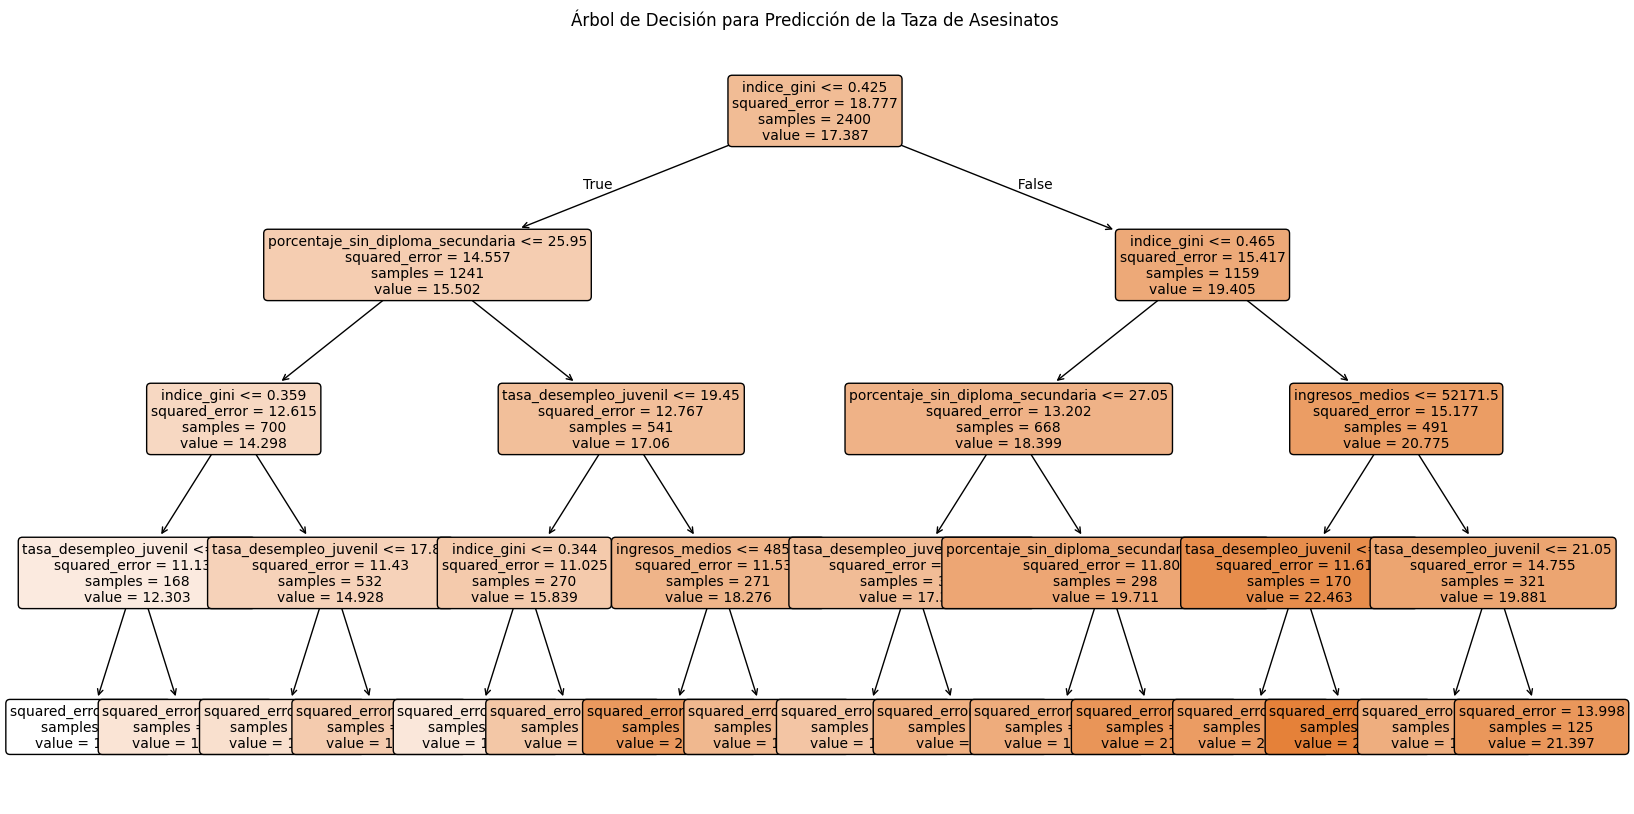

In [12]:
from sklearn.tree import plot_tree

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree_model,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árbol de Decisión para Predicción de la Taza de Asesinatos")
plt.show()

Error cuadrático medio (MSE): 12.05
Coeficiente de determinación (R²): 0.40
3.4708390128006896


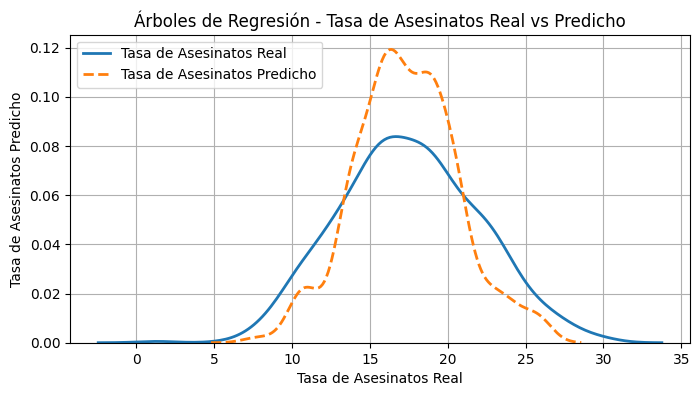

In [28]:
tree_model = DecisionTreeRegressor(random_state=42, max_depth=6)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Error cuadrático medio (MSE): {mse_tree:.2f}")
print(f"Coeficiente de determinación (R²): {r2_tree:.2f}")

# Calcular el RMSE (mas facil de interpretar que el MSE)
rmse = np.sqrt(mse_tree)
print(rmse)

# Comparación visual de distribuciones
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Tasa de Asesinatos Real', linewidth=2)
sns.kdeplot(y_pred_tree, label='Tasa de Asesinatos Predicho', linewidth=2, linestyle='--')

plt.title('Árboles de Regresión - Tasa de Asesinatos Real vs Predicho')
plt.xlabel('Tasa de Asesinatos Real')
plt.ylabel('Tasa de Asesinatos Predicho')
plt.legend()
plt.grid(True)
plt.show()

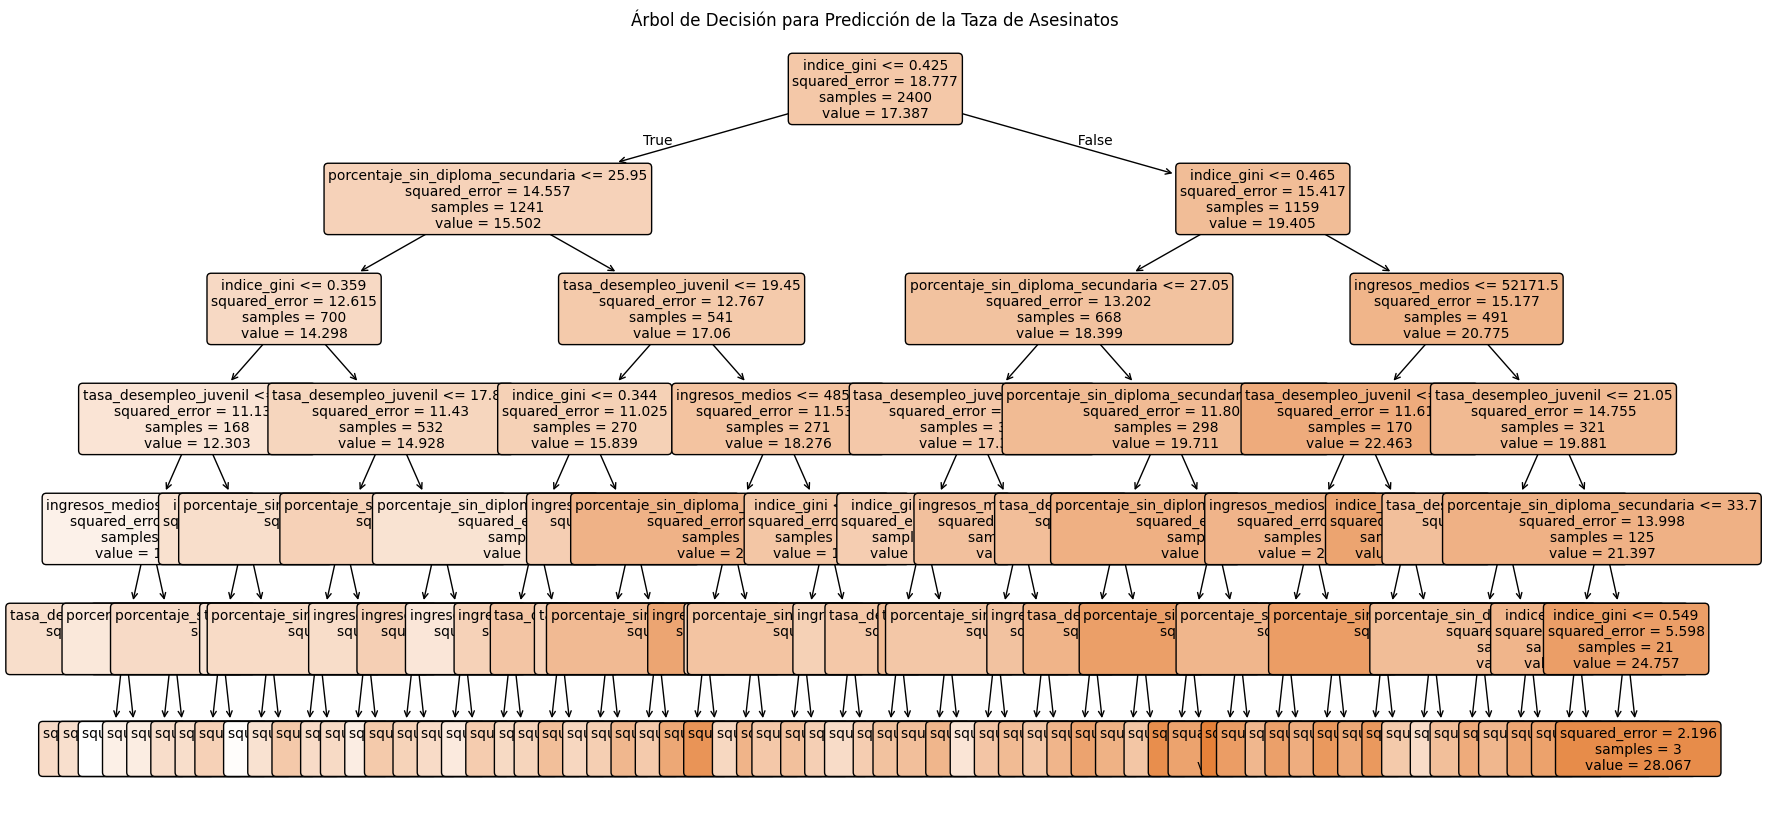

In [29]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree_model,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árbol de Decisión para Predicción de la Taza de Asesinatos")
plt.show()

### Al utilizar los ajustes por defecto se logro consiguir un 37% pero al aumentar demasiado como por ejemplo a una profundidad de 9 el porcentaje disminuye hasta un 10%, en la profundidad en la que logre tener mas porcentaje fue con 6 logrando obtener un 40%